In [1]:
#Load packages
#Data handling
import requests
import numpy as np
import pandas as pd
import string as st
import os
import csv
import re
import random

import matplotlib
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib auto

Using matplotlib backend: MacOSX


In [2]:
#Set path
#path1 = '/Users/eihoman/Desktop/DSI/Machine Learning/Final Project/ML_Final_Gestational_Age.csv'
#path2 = '/Users/eihoman/Desktop/DSI/Machine Learning/Final Project/ML_Final_Gestational_Age_2.csv'
#path3 = '/Users/eihoman/Desktop/DSI/Machine Learning/Final Project/ML_Final_Gestational_Age_3.csv'
#path4 = '/Users/eihoman/Desktop/DSI/Machine Learning/Final Project/ML_Final_Gestational_Age_4.csv'

path1 = '/Users/caitdreisbach/Downloads/ML_Final_Gestational_Age_CSV/ML_Final_Gestational_Age.csv'
path2 = '/Users/caitdreisbach/Downloads/ML_Final_Gestational_Age_CSV/ML_Final_Gestational_Age_2.csv'
path3 = '/Users/caitdreisbach/Downloads/ML_Final_Gestational_Age_CSV/ML_Final_Gestational_Age_3.csv'
path4 = '/Users/caitdreisbach/Downloads/ML_Final_Gestational_Age_CSV/ML_Final_Gestational_Age_4.csv'

In [3]:
episodes = pd.read_csv(path1)

In [4]:
visits = pd.read_csv(path2)

In [5]:
diagnoses = pd.read_csv(path3)

In [6]:
labs = pd.read_csv(path4)

In [7]:
episodes.head()

,ptid,epid,epname,startdate,enddate,comments,Nbabies,status,pregravidbmi,elpdate,...,ectopic,deldate,birthstatus,gestage,hxgestage,termdesc,livebirth,deltype,laborlen,birthwt
0,310255,5197344,2nd pregnancy,06/20/2012,10/22/2013,NaN,1.0,2,25.7,04/11/2012,...,0,01/22/2013,A,39,39w 6d,Term,Yes,"Vaginal, Spontaneous Delivery",426,115.24
1,70220,4155001,5th pregnancy,12/14/2011,07/24/2012,NaN,1.0,2,NaN,10/17/2011,...,0,07/19/2012,A,38,38w 3d,Term,Yes,"Vaginal, Spontaneous Delivery",0,118.03
2,162324,4785914,4th pregnancy,04/11/2012,11/29/2012,NaN,1.0,2,53.0,01/01/2012,...,0,10/16/2012,A,40,40w 2d,Term,Yes,"Vaginal, Spontaneous Delivery",675,106.49
3,287408,4094256,1st pregnancy,12/02/2011,08/21/2012,NaN,1.0,2,NaN,10/02/2011,...,0,07/17/2012,A,40,40w 2d,Term,Yes,"Vaginal, Spontaneous Delivery",540,110.69
4,145243,3978714,1st pregnancy,11/09/2011,07/17/2012,NaN,1.0,2,26.8,09/26/2011,...,0,07/17/2012,A,41,41w 1d,Term,Yes,"Vaginal, Spontaneous Delivery",1230,111.61


In [8]:
visits.head()

,ptid,epid,visitdate,age,race,ethnicity,payor,payscale,dx_desc,firstvisit,lastvisit,Nvisits,sbp,dbp,wt,ht,bmi
0,6905,4434961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,901471,3621058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,787426,3724058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,310255,5197344,06/20/2012,24.0,B,N,MCAID,1.0,PREG EXAM-UNCONFIRMED,06/20/2012,01/22/2013,15,106.0,66.0,148.0,63.0,26.2
4,310255,5197344,07/05/2012,24.0,B,N,MCAID,1.0,TOBAC USE COMP PREG-AP,06/20/2012,01/22/2013,15,92.0,58.0,147.0,NaN,NaN


In [9]:
diagnoses.head()

,ptid,epid,dxdate,dx,dxdesc,data_src
0,310255,5197344,06/20/2012,V72.40,PREGNANCY TEST UNCONFIRM,OP
1,310255,5197344,07/05/2012,649.00,TOBACCO USE DISORD-UNSP,OP
2,310255,5197344,07/05/2012,649.03,TOBACCO USE DIS-ANTEPART,OP
3,310255,5197344,07/05/2012,V22.1,SUPERVIS OTH NORMAL PREG,OP
4,310255,5197344,07/06/2012,649.63,UTERINE SIZE DES-ANTEPAR,OP


In [10]:
labs.head()

,ptid,epid,labdate,pat_loc,panel,mne,nresult,tresult
0,70220,4155001,12/14/2011,OBHB,TAS,%ABR,0.0,AB POSITIVE
1,70220,4155001,12/14/2011,OBHB,TAS,%AS,0.0,NEGATIVE
2,70220,4155001,12/14/2011,OBHB,UASCR,APP,0.0,CLEAR
3,70220,4155001,12/14/2011,OBHB,UASCR,BILI,0.0,NEGATIVE
4,70220,4155001,12/14/2011,OBHB,UASCR,BLOD,0.0,NEGATIVE


In [11]:
combined = pd.DataFrame(columns=list(["ptid","age","race","ethnicity","Nbabies","pregravidbmi", 'gravida', 'para',
       'term', 'preterm', 'abort', 'tab', 'sab', 'ectopic',"gestage"]))

In [12]:
combined.head()

,ptid,age,race,ethnicity,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage


In [13]:
episodes.isnull().sum()

ptid               0
epid               0
epname             0
startdate          0
enddate            0
comments        3936
Nbabies           85
status             0
pregravidbmi    1488
elpdate            0
edddate            0
hxorder            0
gravida            0
para               0
term               0
preterm            0
abort              0
tab                0
sab                0
ectopic            0
deldate            0
birthstatus        0
gestage            0
hxgestage          0
termdesc           0
livebirth          0
deltype            0
laborlen           0
birthwt            0
dtype: int64

In [14]:
len(episodes)

4236

In [15]:
episodes_clean = episodes.copy()

In [16]:
episodes_clean.pregravidbmi = episodes.pregravidbmi.fillna(episodes.pregravidbmi.median())

In [17]:
episodes_clean.head()

,ptid,epid,epname,startdate,enddate,comments,Nbabies,status,pregravidbmi,elpdate,...,ectopic,deldate,birthstatus,gestage,hxgestage,termdesc,livebirth,deltype,laborlen,birthwt
0,310255,5197344,2nd pregnancy,06/20/2012,10/22/2013,NaN,1.0,2,25.7,04/11/2012,...,0,01/22/2013,A,39,39w 6d,Term,Yes,"Vaginal, Spontaneous Delivery",426,115.24
1,70220,4155001,5th pregnancy,12/14/2011,07/24/2012,NaN,1.0,2,26.1,10/17/2011,...,0,07/19/2012,A,38,38w 3d,Term,Yes,"Vaginal, Spontaneous Delivery",0,118.03
2,162324,4785914,4th pregnancy,04/11/2012,11/29/2012,NaN,1.0,2,53.0,01/01/2012,...,0,10/16/2012,A,40,40w 2d,Term,Yes,"Vaginal, Spontaneous Delivery",675,106.49
3,287408,4094256,1st pregnancy,12/02/2011,08/21/2012,NaN,1.0,2,26.1,10/02/2011,...,0,07/17/2012,A,40,40w 2d,Term,Yes,"Vaginal, Spontaneous Delivery",540,110.69
4,145243,3978714,1st pregnancy,11/09/2011,07/17/2012,NaN,1.0,2,26.8,09/26/2011,...,0,07/17/2012,A,41,41w 1d,Term,Yes,"Vaginal, Spontaneous Delivery",1230,111.61


In [18]:
episodes_clean = episodes_clean.drop(columns="comments")

In [19]:
episodes_clean.Nbabies = episodes_clean.Nbabies.fillna(episodes_clean.Nbabies.median())

In [20]:
episodes_clean.isnull().sum().sum()

0

In [21]:
episodes_clean.ptid.nunique()

3712

In [22]:
episodes_clean_pt = episodes_clean.groupby("ptid").first()

In [23]:
type(episodes_clean_pt)

pandas.core.frame.DataFrame

In [24]:
episodes_clean_pt.head()

,epid,epname,startdate,enddate,Nbabies,status,pregravidbmi,elpdate,edddate,hxorder,...,ectopic,deldate,birthstatus,gestage,hxgestage,termdesc,livebirth,deltype,laborlen,birthwt
ptid,,,,,,,,,,,,,,,,,,,,,
540,14967571,2nd pregnancy,12/09/2015,08/31/2016,1.0,2,25.7,10/10/2015,07/23/2016,2,...,0,07/18/2016,A,39,39w 2d,Term,Yes,"C-Section, Low Transverse",0,121.34
567,6543270,First pregnancy,01/08/2013,11/03/2015,1.0,2,21.8,11/07/2012,08/21/2013,1,...,0,08/14/2013,A,39,39w,Term,Yes,"Vaginal, Spontaneous Delivery",0,85.50
637,13271669,2nd pregnancy,05/27/2015,01/08/2016,1.0,2,26.1,03/30/2015,01/11/2016,2,...,0,01/07/2016,A,39,39w 3d,Term,Yes,"Vaginal, Spontaneous Delivery",636,122.75
749,5847174,1st pregnancy,09/27/2012,04/21/2013,1.0,2,19.6,08/15/2012,05/29/2013,1,...,0,04/21/2013,D,34,34w 4d,Preterm,No,"C-Section, Low Transverse",0,88.90
780,6502259,1st pregnancy,01/02/2013,08/01/2013,1.0,2,26.1,10/31/2012,08/14/2013,1,...,0,07/31/2013,A,38,38w,Term,Yes,"Vaginal, Spontaneous Delivery",640,82.89


In [25]:
episodes_clean_pt.columns

Index(['epid', 'epname', 'startdate', 'enddate', 'Nbabies', 'status',
       'pregravidbmi', 'elpdate', 'edddate', 'hxorder', 'gravida', 'para',
       'term', 'preterm', 'abort', 'tab', 'sab', 'ectopic', 'deldate',
       'birthstatus', 'gestage', 'hxgestage', 'termdesc', 'livebirth',
       'deltype', 'laborlen', 'birthwt'],
      dtype='object')

In [26]:
len(episodes_clean_pt)

3712

In [27]:
len(episodes_clean)

4236

In [28]:
combined = combined.groupby("ptid").first()

In [29]:
combined_df = pd.concat([combined,episodes_clean_pt],join_axes=[combined.columns])

In [30]:
combined_df.head(20)

,age,race,ethnicity,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage
ptid,,,,,,,,,,,,,,
540,NaN,NaN,NaN,1.0,25.7,2,1,0,1,0,0,0,0,39
567,NaN,NaN,NaN,1.0,21.8,1,0,0,0,0,0,0,0,39
637,NaN,NaN,NaN,1.0,26.1,2,1,1,0,0,0,0,0,39
749,NaN,NaN,NaN,1.0,19.6,1,0,0,0,0,0,0,0,34
780,NaN,NaN,NaN,1.0,26.1,1,0,0,0,0,0,0,0,38
956,NaN,NaN,NaN,1.0,24.8,2,0,0,0,1,0,1,0,37
1128,NaN,NaN,NaN,1.0,33.6,3,1,1,0,1,0,0,0,39
1568,NaN,NaN,NaN,1.0,20.9,1,0,0,0,0,0,0,0,37
1900,NaN,NaN,NaN,1.0,38.1,8,4,3,1,2,0,2,0,39


In [31]:
visits.isnull().sum()

ptid              0
epid              0
visitdate      2572
age            2572
race           2572
ethnicity      2572
payor          2572
payscale       2572
dx_desc        2572
firstvisit     2572
lastvisit      2572
Nvisits           0
sbp           30064
dbp           30064
wt            30064
ht            68307
bmi           68307
dtype: int64

In [32]:
len(visits)

90804

In [33]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of dtype floating point are imputed with the mean.
        Columns of other types are imputed with median of the column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') 
                               else X[c].mean() if X[c].dtype == np.dtype('f')
                                else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [34]:
visits_clean = DataFrameImputer().fit_transform(visits)

In [35]:
visits_clean.isnull().sum().sum()

0

In [36]:
visits_clean_pt = visits_clean.groupby("ptid").first()

In [37]:
visits_clean_pt.head()

,epid,visitdate,age,race,ethnicity,payor,payscale,dx_desc,firstvisit,lastvisit,Nvisits,sbp,dbp,wt,ht,bmi
ptid,,,,,,,,,,,,,,,,
466,2730835,04/16/2015,28.0,W,N,MCAIDHMO,1.0,SUPERVIS NORMAL PREG NEC,10/23/2013,12/12/2016,0,110.0,64.0,168.0,64.0,30.2
540,14967571,01/05/2016,28.0,W,N,SELF PAY,0.0,Unknown,01/05/2016,07/18/2016,19,110.0,64.0,168.0,64.0,30.2
567,6543270,01/08/2013,18.0,B,N,BCROSS,7.0,UTER SIZE DISCREP-AP,01/08/2013,08/13/2013,13,110.0,64.0,168.0,64.0,30.2
637,13271669,05/27/2015,24.0,W,N,MCAID,2.0,SUPERVIS NORMAL PREG NEC,05/27/2015,01/07/2016,21,100.0,55.0,150.7,64.5,25.5
749,5847174,10/10/2012,18.0,W,N,MCAIDHMO,1.0,UTER SIZE DISCREP-AP,10/10/2012,04/21/2013,7,110.0,64.0,168.0,64.0,30.2


In [38]:
combined_df.head()

,age,race,ethnicity,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage
ptid,,,,,,,,,,,,,,
540,NaN,NaN,NaN,1.0,25.7,2,1,0,1,0,0,0,0,39
567,NaN,NaN,NaN,1.0,21.8,1,0,0,0,0,0,0,0,39
637,NaN,NaN,NaN,1.0,26.1,2,1,1,0,0,0,0,0,39
749,NaN,NaN,NaN,1.0,19.6,1,0,0,0,0,0,0,0,34
780,NaN,NaN,NaN,1.0,26.1,1,0,0,0,0,0,0,0,38


In [39]:
combined_df = combined_df.drop(["age","race","ethnicity"], axis=1)

In [40]:
combined_df.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage
ptid,,,,,,,,,,,
540,1.0,25.7,2,1,0,1,0,0,0,0,39
567,1.0,21.8,1,0,0,0,0,0,0,0,39
637,1.0,26.1,2,1,1,0,0,0,0,0,39
749,1.0,19.6,1,0,0,0,0,0,0,0,34
780,1.0,26.1,1,0,0,0,0,0,0,0,38


In [41]:
visits_clean_pt2 = visits_clean_pt[["age","race","ethnicity","payor","payscale"]]

In [42]:
visits_clean_pt2.head()

,age,race,ethnicity,payor,payscale
ptid,,,,,
466,28.0,W,N,MCAIDHMO,1.0
540,28.0,W,N,SELF PAY,0.0
567,18.0,B,N,BCROSS,7.0
637,24.0,W,N,MCAID,2.0
749,18.0,W,N,MCAIDHMO,1.0


In [43]:
compiled = combined_df.join(visits_clean_pt2, how='outer')

In [44]:
compiled.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage,age,race,ethnicity,payor,payscale
ptid,,,,,,,,,,,,,,,,
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,W,N,MCAIDHMO,1.0
540,1.0,25.7,2,1,0,1,0,0,0,0,39,28.0,W,N,SELF PAY,0.0
567,1.0,21.8,1,0,0,0,0,0,0,0,39,18.0,B,N,BCROSS,7.0
637,1.0,26.1,2,1,1,0,0,0,0,0,39,24.0,W,N,MCAID,2.0
749,1.0,19.6,1,0,0,0,0,0,0,0,34,18.0,W,N,MCAIDHMO,1.0


In [45]:
compiled2 = compiled.dropna(thresh=12)

In [46]:
compiled2.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,gestage,age,race,ethnicity,payor,payscale
ptid,,,,,,,,,,,,,,,,
540,1.0,25.7,2,1,0,1,0,0,0,0,39,28.0,W,N,SELF PAY,0.0
567,1.0,21.8,1,0,0,0,0,0,0,0,39,18.0,B,N,BCROSS,7.0
637,1.0,26.1,2,1,1,0,0,0,0,0,39,24.0,W,N,MCAID,2.0
749,1.0,19.6,1,0,0,0,0,0,0,0,34,18.0,W,N,MCAIDHMO,1.0
780,1.0,26.1,1,0,0,0,0,0,0,0,38,18.0,B,N,BCROSS,7.0


In [47]:
len(compiled2)

3712

In [48]:
diagnoses.head()

,ptid,epid,dxdate,dx,dxdesc,data_src
0,310255,5197344,06/20/2012,V72.40,PREGNANCY TEST UNCONFIRM,OP
1,310255,5197344,07/05/2012,649.00,TOBACCO USE DISORD-UNSP,OP
2,310255,5197344,07/05/2012,649.03,TOBACCO USE DIS-ANTEPART,OP
3,310255,5197344,07/05/2012,V22.1,SUPERVIS OTH NORMAL PREG,OP
4,310255,5197344,07/06/2012,649.63,UTERINE SIZE DES-ANTEPAR,OP


In [49]:
diagnoses2 = diagnoses.drop(["epid","dxdate","dxdesc","data_src"], axis=1)

In [50]:
diagnoses2.head()

,ptid,dx
0,310255,V72.40
1,310255,649.00
2,310255,649.03
3,310255,V22.1
4,310255,649.63


In [51]:
diagnoses3 = diagnoses2.groupby(["ptid","dx"]).agg("count")

In [52]:
diagnoses3.head(20)

Empty DataFrame
Columns: []
Index: [(540, B96.89), (540, D64.9), (540, D68.2), (540, D68.51), (540, E66.9), (540, J45.909), (540, M79.604), (540, M79.605), (540, M79.652), (540, N12), (540, N76.0), (540, O09.211), (540, O09.212), (540, O09.213), (540, O09.291), (540, O09.292), (540, O09.293), (540, O09.90), (540, O09.91), (540, O09.92)]

In [53]:
diagnoses3["count"]=1

In [54]:
diagnoses3.head()

count
ptid dx           
540  B96.89      1
     D64.9       1
     D68.2       1
     D68.51      1
     E66.9       1

In [55]:
diagnoses4 = diagnoses3.unstack()

In [56]:
diagnoses4.head()

count                                                            ...    \
dx   008.43 008.45 008.8 009.1 011.90 034.0 038.0 038.11 038.42 038.9  ...     
ptid                                                                   ...     
540     NaN    NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN  ...     
567     NaN    NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN  ...     
637     NaN    NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN  ...     
749     NaN    NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN  ...     
780     NaN    NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN  ...     

                                                                            
dx   Z96.41 Z96.7 Z98.1 Z98.84 Z98.870 Z98.89 Z98.890 Z98.891 Z99.2 Z99.81  
ptid                                                                        
540     NaN   NaN   NaN    NaN     NaN    NaN     NaN     NaN   NaN    NaN  
567     NaN   NaN   NaN    NaN     NaN    NaN     NaN     NaN   NaN    NaN  
637     NaN   NaN   NaN    NaN     NaN    NaN     NaN     NaN   NaN    NaN  
749     NaN   NaN   NaN    NaN     NaN    NaN     NaN     NaN   NaN    NaN  
780     NaN   NaN   NaN    NaN     NaN    NaN     NaN     NaN   NaN    NaN  

[5 rows x 4086 columns]

In [57]:
diagnoses5 = diagnoses4.fillna(0)

In [58]:
diagnoses5.loc[540,("count","D64.9")]

1.0

In [59]:
diagnoses6 = diagnoses5.copy()

In [60]:
diagnoses6.columns = diagnoses5.columns.droplevel(0)

In [61]:
diagnoses6.head()

dx,008.43,008.45,008.8,009.1,011.90,034.0,038.0,038.11,038.42,038.9,...,Z96.41,Z96.7,Z98.1,Z98.84,Z98.870,Z98.89,Z98.890,Z98.891,Z99.2,Z99.81
ptid,,,,,,,,,,,,,,,,,,,,,
540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
compiled3 = compiled2.join(diagnoses6, how='outer')

In [63]:
compiled3.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,Z96.41,Z96.7,Z98.1,Z98.84,Z98.870,Z98.89,Z98.890,Z98.891,Z99.2,Z99.81
ptid,,,,,,,,,,,,,,,,,,,,,
540,1.0,25.7,2,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,1.0,21.8,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,1.0,26.1,2,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,1.0,19.6,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,1.0,26.1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
compiled_final = compiled3.copy()

### Data Cleaning

In [66]:
list(compiled_final.columns)

['Nbabies',
 'pregravidbmi',
 'gravida',
 'para',
 'term',
 'preterm',
 'abort',
 'tab',
 'sab',
 'ectopic',
 'gestage',
 'age',
 'race',
 'ethnicity',
 'payor',
 'payscale',
 '008.43',
 '008.45',
 '008.8',
 '009.1',
 '011.90',
 '034.0',
 '038.0',
 '038.11',
 '038.42',
 '038.9',
 '041.02',
 '041.04',
 '041.09',
 '041.12',
 '041.3',
 '041.49',
 '041.85',
 '041.86',
 '041.89',
 '041.9',
 '042',
 '053.9',
 '054.10',
 '054.12',
 '054.19',
 '054.2',
 '054.9',
 '057.0',
 '058.89',
 '070.30',
 '070.32',
 '070.44',
 '070.54',
 '070.70',
 '078.0',
 '078.10',
 '078.11',
 '078.5',
 '078.88',
 '078.89',
 '079.4',
 '079.83',
 '079.88',
 '079.98',
 '079.99',
 '084.0',
 '084.6',
 '088.81',
 '098.0',
 '099.50',
 '099.53',
 '099.54',
 '099.55',
 '099.8',
 '099.9',
 '110.3',
 '110.5',
 '111.0',
 '111.9',
 '112.0',
 '112.1',
 '112.3',
 '112.9',
 '117.9',
 '120.9',
 '128.9',
 '131.01',
 '131.09',
 '131.9',
 '133.0',
 '135',
 '136.1',
 '136.9',
 '154.1',
 '157.9',
 '162.9',
 '173.31',
 '193',
 '197.7',
 '2

In [67]:
numerics = ['Nbabies','pregravidbmi','gravida','para','term','preterm','abort','tab','sab','ectopic','age','payscale']

In [68]:
categories = ['race','ethnicity','payor']

In [69]:
compiled_final[categories].head()

,race,ethnicity,payor
ptid,,,
540,W,N,SELF PAY
567,B,N,BCROSS
637,W,N,MCAID
749,W,N,MCAIDHMO
780,B,N,BCROSS


In [70]:
data_new = compiled_final.copy()
data_new.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,Z96.41,Z96.7,Z98.1,Z98.84,Z98.870,Z98.89,Z98.890,Z98.891,Z99.2,Z99.81
ptid,,,,,,,,,,,,,,,,,,,,,
540,1.0,25.7,2,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,1.0,21.8,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,1.0,26.1,2,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,1.0,19.6,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,1.0,26.1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data_new = data_new.drop("gestage",axis=1)

In [72]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_new[numerics] = min_max_scaler.fit_transform(compiled_final[numerics])

In [73]:
data_ohe = pd.get_dummies(data_new, drop_first = False)
data_ohe.head()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,payor_MCAID OS,payor_MCAIDHMO,payor_MCARE,payor_MCARE AD,payor_MG CARE,payor_OTHER,payor_SELF PAY,payor_SO HLTH,payor_TRICARE,payor_UNITED
ptid,,,,,,,,,,,,,,,,,,,,,
540,0.0,0.048746,0.066667,0.083333,0.000000,0.2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
567,0.0,0.030289,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
637,0.0,0.050639,0.066667,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
749,0.0,0.019877,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
780,0.0,0.050639,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data_ohe['gestage'] = compiled_final["gestage"]

In [75]:
list(data_ohe.columns)[4120:4127]

['payor_MG CARE',
 'payor_OTHER',
 'payor_SELF PAY',
 'payor_SO HLTH',
 'payor_TRICARE',
 'payor_UNITED',
 'gestage']

In [76]:
data_ohe[data_ohe['gestage']==0].index

Int64Index([ 143079,  267229,  493041,  566566,  906898, 1343828, 1628197,
            1644241, 1676493, 1785195],
           dtype='int64', name='ptid')

In [77]:
data_final = data_ohe.drop(index=[143079,  267229,  493041,  566566,  906898, 1343828, 1628197, 1644241, 1676493, 1785195])

In [78]:
data_final.isna().any()

Nbabies           False
pregravidbmi      False
gravida           False
para              False
term              False
preterm           False
abort             False
tab               False
sab               False
ectopic           False
age               False
payscale          False
008.43             True
008.45             True
008.8              True
009.1              True
011.90             True
034.0              True
038.0              True
038.11             True
038.42             True
038.9              True
041.02             True
041.04             True
041.09             True
041.12             True
041.3              True
041.49             True
041.85             True
041.86             True
                  ...  
Z99.81             True
race_A            False
race_B            False
race_H            False
race_I            False
race_N            False
race_O            False
race_U            False
race_W            False
ethnicity_0       False
ethnicity_H     

In [79]:
#lists columns with NAs present
data_final.columns[data_final.isna().any()].tolist()

['008.43',
 '008.45',
 '008.8',
 '009.1',
 '011.90',
 '034.0',
 '038.0',
 '038.11',
 '038.42',
 '038.9',
 '041.02',
 '041.04',
 '041.09',
 '041.12',
 '041.3',
 '041.49',
 '041.85',
 '041.86',
 '041.89',
 '041.9',
 '042',
 '053.9',
 '054.10',
 '054.12',
 '054.19',
 '054.2',
 '054.9',
 '057.0',
 '058.89',
 '070.30',
 '070.32',
 '070.44',
 '070.54',
 '070.70',
 '078.0',
 '078.10',
 '078.11',
 '078.5',
 '078.88',
 '078.89',
 '079.4',
 '079.83',
 '079.88',
 '079.98',
 '079.99',
 '084.0',
 '084.6',
 '088.81',
 '098.0',
 '099.50',
 '099.53',
 '099.54',
 '099.55',
 '099.8',
 '099.9',
 '110.3',
 '110.5',
 '111.0',
 '111.9',
 '112.0',
 '112.1',
 '112.3',
 '112.9',
 '117.9',
 '120.9',
 '128.9',
 '131.01',
 '131.09',
 '131.9',
 '133.0',
 '135',
 '136.1',
 '136.9',
 '154.1',
 '157.9',
 '162.9',
 '173.31',
 '193',
 '197.7',
 '201.90',
 '202.00',
 '204.01',
 '209.29',
 '209.72',
 '211.3',
 '215.9',
 '216.5',
 '216.7',
 '216.9',
 '217',
 '218.1',
 '218.2',
 '218.9',
 '219.0',
 '219.8',
 '220',
 '221.8

In [80]:
#drops NA columns
X = data_final.dropna() 

In [81]:
X[X['gestage']==0] #now nothing to drop

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,payor_MCAIDHMO,payor_MCARE,payor_MCARE AD,payor_MG CARE,payor_OTHER,payor_SELF PAY,payor_SO HLTH,payor_TRICARE,payor_UNITED,gestage
ptid,,,,,,,,,,,,,,,,,,,,,


In [82]:
#read out to a CSV to expedite pre-processing and analysis
X.to_csv("/Users/caitdreisbach/Downloads/DataFinal_clean.csv", header=True)

### Linear Modeling 

In [83]:
from scipy.stats import stats
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline

/Users/caitdreisbach/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<function seaborn.utils.despine>

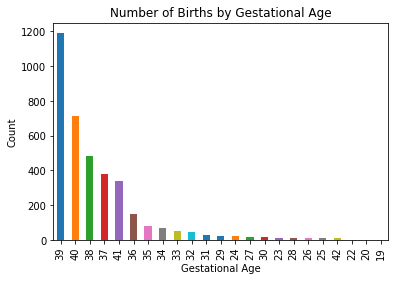

In [84]:
X['gestage'].value_counts().plot(kind='bar')
plt.title('Number of Births by Gestational Age')
plt.xlabel('Gestational Age')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine>

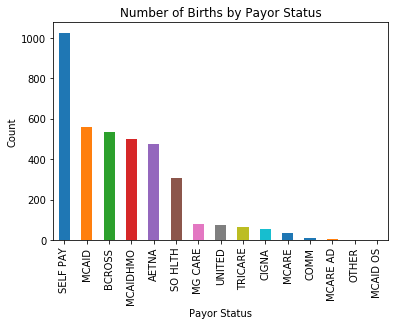

In [85]:
compiled_final['payor'].value_counts().plot(kind='bar')
plt.title('Number of Births by Payor Status')
plt.xlabel('Payor Status')
plt.ylabel('Count')
sns.despine

In [86]:
labels = X['gestage']
X_df = X.drop(['gestage'],axis=1)

In [87]:
X_df.describe()

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,payor_MCAID OS,payor_MCAIDHMO,payor_MCARE,payor_MCARE AD,payor_MG CARE,payor_OTHER,payor_SELF PAY,payor_SO HLTH,payor_TRICARE,payor_UNITED
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,0.018231,0.057129,0.105234,0.085374,0.073968,0.026068,0.054313,0.010612,0.037905,0.007755,...,0.000272,0.128980,0.008707,0.001088,0.020952,0.000544,0.278095,0.083265,0.017143,0.020408
std,0.097294,0.035835,0.114735,0.102789,0.096047,0.082461,0.097323,0.053396,0.081644,0.066052,...,0.016496,0.335223,0.092919,0.032978,0.143244,0.023325,0.448122,0.276320,0.129821,0.141411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.041174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.050639,0.066667,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.061051,0.133333,0.166667,0.083333,0.000000,0.100000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 540 to 1798750
Columns: 4126 entries, Nbabies to payor_UNITED
dtypes: float64(4098), uint8(28)
memory usage: 115.0 MB


In [89]:
X_train , X_test , y_train , y_test = train_test_split(X_df , 
                                                       labels , 
                                                       test_size = 0.10,
                                                       random_state =2)

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((368, 4126), (368,))

In [90]:
reg = LinearRegression()

In [91]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
reg.score(X_test,y_test)

-4.5519768303599378e+19

In [93]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  2.17211093e+00  -6.51391334e-01  -5.84566355e+00 ...,   1.23253527e+10
   1.23253527e+10   1.23253527e+10]
Mean squared error: 493631541636673634304.00
Variance score: -45519768303599378432.00


#### Feature Selection

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from __future__ import division

In [96]:
def select_kbest_reg(data_frame, target, k=5):
    """
    Selecting K-Best features regression
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_regression, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores 

In [97]:
#target = X['gestage']
#select_kbest_reg(X, target, k=20)

#### Feature Selection and Regression without Diagnostic Codes

Due to the imbalance of diagnostic codes, we are removing those columns.

In [98]:
X_df.columns.get_loc("Z99.81")

4097

In [99]:
X_df.columns.get_loc("008.43")

12

In [100]:
X_df.drop(X_df.iloc[:, 12:4097], inplace=True, axis=1)

In [101]:
X_df.head(10)

,Nbabies,pregravidbmi,gravida,para,term,preterm,abort,tab,sab,ectopic,...,payor_MCAID OS,payor_MCAIDHMO,payor_MCARE,payor_MCARE AD,payor_MG CARE,payor_OTHER,payor_SELF PAY,payor_SO HLTH,payor_TRICARE,payor_UNITED
ptid,,,,,,,,,,,,,,,,,,,,,
540,0.0,0.048746,0.066667,0.083333,0.000000,0.2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
567,0.0,0.030289,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
637,0.0,0.050639,0.066667,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
749,0.0,0.019877,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
780,0.0,0.050639,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
956,0.0,0.044487,0.066667,0.000000,0.000000,0.0,0.1,0.0,0.1,0.0,...,0,0,0,0,0,0,0,0,0,0
1128,0.0,0.086133,0.133333,0.083333,0.083333,0.0,0.1,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1568,0.0,0.026029,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1900,0.0,0.107430,0.466667,0.333333,0.250000,0.2,0.2,0.0,0.2,0.0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
X_reduced = X_df
X_reduced.shape

(3675, 41)

In [103]:
X_train_r , X_test_r , y_train_r , y_test_r = train_test_split(X_reduced , 
                                                       labels , 
                                                       test_size = 0.10,
                                                       random_state =2)

X_train_r.shape, y_train_r.shape
X_test_r.shape, y_test_r.shape

((368, 41), (368,))

In [104]:
reg = LinearRegression()

In [105]:
reg.fit(X_train_r,y_train_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
reg.score(X_test_r,y_test_r)

0.20771132829391814

In [107]:
# Make predictions using the testing set
y_pred_r = reg.predict(X_test_r)

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_r, y_pred_r))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_r, y_pred_r))

Coefficients: 
 [ -7.57769702e+00   1.68546190e-01   2.27331770e+00   1.21080348e+00
  -4.51850673e-01  -6.96407510e+00  -8.89372328e-01   1.88374901e-01
  -1.18579963e+00  -1.32514692e+00  -1.13109605e+00   4.14222195e-01
   7.54951657e-15   7.83692673e-01   9.90228535e-02  -1.51763558e-01
  -2.26108720e+00   6.58372428e-01   5.19547515e-03   6.39292394e-01
   2.27274931e-01  -3.07283400e+00   3.88900996e-01   1.42514708e-01
   4.60153127e-01   2.08126517e+00   4.87524217e-01  -1.73475860e-01
   7.61437539e-02  -1.48426715e+00   3.14011187e-01  -2.81843189e+00
  -3.94640216e-01  -1.30246750e-01   1.21791917e+00  -1.05595579e+00
   2.51012822e+00   2.70130374e-01   6.46177487e-01   4.88112302e-01
   4.68709524e-02]
Mean squared error: 8.59
Variance score: 0.21


#### Lasso & ElasticNet 

Estimates Lasso and Elastic-Net regression models on our full sparse dataset & reduced set.

In [109]:
# Lasso Regression on full dataset
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.301496


In [110]:
# Lasso Regression on small dataset
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train_r, y_train_r).predict(X_test_r)
r2_score_lasso = r2_score(y_test_r, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.002755


In [111]:
# ElasticNet on full feature set
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.308986


In [112]:
# ElasticNet on full feature set
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet_r = enet.fit(X_train_r, y_train_r).predict(X_test_r)
r2_score_enet = r2_score(y_test_r, y_pred_enet_r)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.001229


### Gradient Boosted Regression 

In [113]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [114]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [115]:
clf.score(X_test,y_test)

0.71829539162422806

In [118]:
#t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [119]:
#y_pred = reg.predict(X_test)

In [120]:
#for i,y_pred in enumerate(clf.staged_predict(x_test)):
#    t_sc[i]=clf.loss_(y_test,y_pred)

### Neural Net

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras import optimizers

# 1091 columns
x_train = data_final.loc[:,'Nbabies':'payor_UNITED']

In [ ]:
# Reset indices of training data
resultstrain2 = resultstrain2.reset_index()

# Create arrays to input into neural network

# Columns
x_training = resultstrain2.loc[:,'SHOCK_INDEX':'SysBP']
x_testing = neuraltest.loc[:,'SHOCK_INDEX':'SysBP']

# drop unwanted columns
x_training = x_training.drop(['CLiF'], axis=1)
x_testing = x_testing.drop(['CLiF'], axis=1)

# one column
y_training = pd.DataFrame(resultstrain2['indexMort'])
y_testing = pd.DataFrame(neuraltest['indexMort'])

template = x_training
trainingfeatures = int(template.shape[1])

numsamples = int(len(x_training) / chunks)
x_train = np.array(x_training)
x_train = x_train.reshape(numsamples, chunks, trainingfeatures)

numsamples = int(len(x_testing) / chunks)
x_test = np.array(x_testing)
x_test = x_test.reshape(numsamples, chunks, trainingfeatures)

y_train = pd.DataFrame()
for i in range(0,(len(y_training))):
    if (i % chunks) == 0:
        y_train = y_train.append(y_training.iloc[i])
y_train = np.array(y_train)

y_test = y_testing[(chunks-1)::chunks]
y_test = y_test.reset_index(drop=True)
y_test = np.array(y_test)

# Create neural network model
model = Sequential()
model.add(LSTM(10, input_shape=(chunks, trainingfeatures)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=(2), epochs=15)
score = model.evaluate(x_test, y_test, batch_size=(2))

# Print results
print(score)
print(model.summary())

# Generate predictions for AUC calculation
predictions = model.predict(x_test)
outcome = pd.DataFrame(predictions, columns=['preds'])
resultspt = y_testing[(chunks-1)::chunks]
x = resultspt["indexMort"]
x = x.reset_index()
x["indexMort"] = x["indexMort"].astype('category')
x = x["indexMort"]
outcome["real"] = x
ptmasks = pd.DataFrame(neuraltest['Pt_Mask'])
pts = ptmasks[(chunks-1)::chunks]
z = pts['Pt_Mask']
z = z.reset_index()
z['Pt_Mask'] = z['Pt_Mask'].astype('int64')
z = z['Pt_Mask']
outcome["Pt_Mask"] = z
print("NEURAL NET:")
plt.hist(outcome.preds)
plt.show()
fpr, tpr, thresholds = roc_curve(outcome.real, outcome.preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr, tpr)
plt.show()
auc = np.trapz(tpr,fpr)
print(auc)
    